## Challenge 3 - Classification
The aliens have raided the office and wiped out everything in the database, leaving Warwick only these datasets. Suppose that Warwick has ~$100 million left to invest in its current fund.

After thoroughly analyzing the data and modeling, come up with one investable asset and label each county as SELL, HOLD or BUY rating for that asset. For example, your classification model may output BUY for class A office properties in Maricopa County, AZ but output SELL for Oklahoma County, OK.

EDIT: Choosing to classify Class A (ie. luxury) apartments only. This will make the thresholds more distinct

In [123]:
import pandas as pd
import os
import numpy as np
%matplotlib inline

In [124]:
path = '/Users/carliebadder/ds/metis/metisgh/Warwick_Challenges/ds-3/classification/'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_files

['Data USA - Map of Average Travel Time by County.csv',
 'Data USA - Map of Child Mortality per 100,000 People by County.csv',
 'Data USA - Map of High School Graduation by County.csv',
 'Data USA - Map of HIV Diagnoses per 100,000 People by County.csv',
 'Data USA - Map of Median Household Income by County.csv',
 'Data USA - Map of Median Property Value by County.csv',
 'Data USA - Map of Percent Uninsured (Adults) by County.csv',
 'Data USA - Map of Rural Population by County.csv',
 'Data USA - Map of Teen Births (Age 15-19) per 1,000 People by County.csv',
 'Data USA - Map of Unemployment by County.csv']

In [125]:
f = '/Users/carliebadder/ds/metis/metisgh/Warwick_Challenges/ds-3/classification/'+csv_files[0]
(pd.read_csv(f).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9661 entries, 0 to 9660
Data columns (total 4 columns):
year                    9661 non-null int64
geo_name                9661 non-null object
geo                     9661 non-null object
mean_commute_minutes    9661 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 302.0+ KB


In [126]:
f = ['/Users/carliebadder/ds/metis/metisgh/Warwick_Challenges/ds-3/classification/'+cf for cf in csv_files]
dfs = [pd.read_csv(f_name).sort_values(['year','geo_name','geo']) for f_name in f]

In [127]:
big_df = dfs[0].append(dfs[1:])

In [128]:
big_df.groupby('geo_name').mean()

,mean_commute_minutes,population_living_in_a_rural_area,year
geo_name,,,
Abbeville County,26.815400,0.78600,2015.4
Acadia Parish,27.589467,0.51700,2015.4
Accomack County,20.320833,1.00000,2015.4
"Ada County, ID",18.565567,0.05500,2015.4
Adair County,20.790558,0.74175,2015.4
Adams County,20.146960,0.67520,2015.4
"Adams County, CO",27.416600,0.03600,2015.4
"Adams County, PA",26.568633,0.53700,2015.4
Addison County,21.846133,0.78400,2015.4


In [129]:
for f in dfs:
    # f.groupby('geo_name')
    print(list(f.columns))

['year', 'geo_name', 'geo', 'mean_commute_minutes']
['year', 'geo_name', 'geo', 'child_mortality']
['year', 'geo_name', 'geo', 'high_school_graduation']
['year', 'geo_name', 'geo', 'hiv_prevalence_rate']
['year', 'geo_name', 'geo', 'income', 'income_moe', 'income_rank']
['year', 'geo_name', 'geo', 'median_property_value', 'median_property_value_moe']
['year', 'geo_name', 'geo', 'uninsured_adults']
['year', 'geo_name', 'geo', 'population_living_in_a_rural_area']
['year', 'geo_name', 'geo', 'teen_births']
['year', 'geo_name', 'geo', 'unemployment']


In [130]:
len(dfs)

10

In [131]:
commute_df = dfs[0]
mort_df = dfs[1]
hsgrad_df = dfs[2]
hiv_df = dfs[3]
income_df = dfs[4]
propval_df = dfs[5]
unins_df = dfs[6]
rural_df = dfs[7]
teen_df = dfs[8] 
umemp_df = dfs[9]

In [132]:
# Pickle Dataframes for later
import pickle

with open('census_dfs.pkl', 'wb') as f:
    pickle.dump(dfs, f)

## Clean Up Data

### Mean Commute

In [133]:
(commute_df.geo_name.unique()) # 2238

array(['Abbeville County', 'Acadia Parish', 'Accomack County', ...,
       'Ziebach County', 'Kusilvak County', 'Oglala Lakota County'], dtype=object)

In [134]:
commute_mn = commute_df.groupby('geo_name')['mean_commute_minutes'].mean()

### Child Mortality

In [135]:
mort_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9418 entries, 580 to 6323
Data columns (total 4 columns):
year               9418 non-null int64
geo_name           9418 non-null object
geo                9418 non-null object
child_mortality    9418 non-null object
dtypes: int64(1), object(3)
memory usage: 367.9+ KB


In [136]:
# replace 'none's with Nan's
mort_df.child_mortality.replace({'None': np.nan}, inplace=True)

In [137]:
# Remove rows where child_mortality == NaN
mort_df.dropna(inplace=True)

In [138]:
mort_df.child_mortality = mort_df.child_mortality.astype('float')

In [139]:
mort_mn = mort_df.groupby('geo_name')['child_mortality'].mean()

### High School Graduation Rate

In [140]:
hsgrad_df.head()

,year,geo_name,geo,high_school_graduation
6589,2015,Abbeville County,05000US45001,0.77
6136,2015,Acadia Parish,05000US22001,0.79
5933,2015,Accomack County,05000US51001,0.8
4852,2015,"Ada County, ID",05000US16001,0.835
8972,2015,Adair County,05000US19001,None


In [141]:
hsgrad_df.high_school_graduation.replace({'None': np.nan}, inplace=True)
hsgrad_df.dropna(inplace=True)
hsgrad_df.high_school_graduation = hsgrad_df.high_school_graduation.astype('float')
hsgrad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7980 entries, 6589 to 7868
Data columns (total 4 columns):
year                      7980 non-null int64
geo_name                  7980 non-null object
geo                       7980 non-null object
high_school_graduation    7980 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 311.7+ KB


In [142]:
hsgrad_mn = hsgrad_df.groupby('geo_name')['high_school_graduation'].mean()

### HIV Prevalence Rate

In [143]:
hiv_df.head()

,year,geo_name,geo,hiv_prevalence_rate
1734,2015,Abbeville County,05000US45001,216.3
2217,2015,Acadia Parish,05000US22001,173.7
662,2015,Accomack County,05000US51001,409.2
3683,2015,"Ada County, ID",05000US16001,100.7
7267,2015,Adair County,05000US19001,None


In [144]:
hiv_df.hiv_prevalence_rate.replace({'None': np.nan}, inplace=True)
hiv_df.dropna(inplace=True)
hiv_df.hiv_prevalence_rate = hiv_df.hiv_prevalence_rate.astype('float')
hiv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7035 entries, 1734 to 3571
Data columns (total 4 columns):
year                   7035 non-null int64
geo_name               7035 non-null object
geo                    7035 non-null object
hiv_prevalence_rate    7035 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 274.8+ KB


In [145]:
hiv_mn = hiv_df.groupby('geo_name')['hiv_prevalence_rate'].mean()

### Income

In [146]:
income_df.head()

,year,geo_name,geo,income,income_moe,income_rank
7877,2013,Abbeville County,05000US45001,35947.0,2692.0,2597.0
7376,2013,Acadia Parish,05000US22001,37587.0,3215.0,2428.0
6789,2013,Accomack County,05000US51001,39328.0,3034.0,2224.0
1606,2013,"Ada County, ID",05000US16001,55210.0,1012.0,496.0
3581,2013,Adair County,05000US19001,47892.0,1765.0,1118.0


In [147]:
income_df.income.replace({'None': np.nan}, inplace=True)
income_df.dropna(inplace=True)
income_df.income = income_df.income.astype('float')
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 7877 to 8099
Data columns (total 6 columns):
year           9660 non-null int64
geo_name       9660 non-null object
geo            9660 non-null object
income         9660 non-null float64
income_moe     9660 non-null object
income_rank    9660 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 528.3+ KB


In [148]:
income_df.drop(['income_moe','income_rank'], axis=1, inplace=True)
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 7877 to 8099
Data columns (total 4 columns):
year        9660 non-null int64
geo_name    9660 non-null object
geo         9660 non-null object
income      9660 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 377.3+ KB


In [149]:
income_mn = income_df.groupby('geo_name')['income'].mean()

### Property Value

In [150]:
propval_df.head()

,year,geo_name,geo,median_property_value,median_property_value_moe
6541,2013,Abbeville County,05000US45001,91200.0,6205.0
6827,2013,Acadia Parish,05000US22001,88600.0,3424.0
2411,2013,Accomack County,05000US51001,153600.0,6406.0
1441,2013,"Ada County, ID",05000US16001,183600.0,2587.0
6576,2013,Adair County,05000US19001,90900.0,5317.0


In [151]:
propval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9661 entries, 6541 to 9080
Data columns (total 5 columns):
year                         9661 non-null int64
geo_name                     9661 non-null object
geo                          9661 non-null object
median_property_value        9661 non-null object
median_property_value_moe    9661 non-null object
dtypes: int64(1), object(4)
memory usage: 452.9+ KB


In [152]:
propval_df.median_property_value.replace({'None': np.nan}, inplace=True)
propval_df.dropna(inplace=True)
propval_df.median_property_value = propval_df.median_property_value.astype('float')
propval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9657 entries, 6541 to 9080
Data columns (total 5 columns):
year                         9657 non-null int64
geo_name                     9657 non-null object
geo                          9657 non-null object
median_property_value        9657 non-null float64
median_property_value_moe    9657 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 452.7+ KB


In [153]:
propval_df.drop('median_property_value_moe', axis=1, inplace=True)
propval_df.head()

,year,geo_name,geo,median_property_value
6541,2013,Abbeville County,05000US45001,91200.0
6827,2013,Acadia Parish,05000US22001,88600.0
2411,2013,Accomack County,05000US51001,153600.0
1441,2013,"Ada County, ID",05000US16001,183600.0
6576,2013,Adair County,05000US19001,90900.0


In [154]:
propval_mn = propval_df.groupby('geo_name')['median_property_value'].mean()

### Uninsured Adults

In [155]:
unins_df.head()

,year,geo_name,geo,uninsured_adults
2939,2015,Abbeville County,05000US45001,0.231
1215,2015,Acadia Parish,05000US22001,0.273
2150,2015,Accomack County,05000US51001,0.248
5102,2015,"Ada County, ID",05000US16001,0.188
8338,2015,Adair County,05000US19001,0.117


In [156]:
unins_df.uninsured_adults.replace({'None': np.nan}, inplace=True)
unins_df.dropna(inplace=True)
unins_df.uninsured_adults = unins_df.uninsured_adults.astype('float')
unins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9415 entries, 2939 to 790
Data columns (total 4 columns):
year                9415 non-null int64
geo_name            9415 non-null object
geo                 9415 non-null object
uninsured_adults    9415 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 367.8+ KB


In [157]:
unins_mn = unins_df.groupby('geo_name')['uninsured_adults'].mean()

### Percentage of Population Living in Rural Areas

In [158]:
rural_df.head()

,year,geo_name,geo,population_living_in_a_rural_area
2895,2015,Abbeville County,05000US45001,0.786
5470,2015,Acadia Parish,05000US22001,0.517
1134,2015,Accomack County,05000US51001,1.000
8907,2015,"Ada County, ID",05000US16001,0.055
228,2015,Adair County,05000US19001,1.000


In [159]:
rural_mn = rural_df.groupby('geo_name')['population_living_in_a_rural_area'].mean()

### Teen Births

In [160]:
teen_df.head()

,year,geo_name,geo,teen_births
4356,2015,Abbeville County,05000US45001,40.7
1093,2015,Acadia Parish,05000US22001,64.6
1554,2015,Accomack County,05000US51001,59.5
7439,2015,"Ada County, ID",05000US16001,23.5
7177,2015,Adair County,05000US19001,25.0


In [161]:
teen_df.teen_births.replace({'None': np.nan}, inplace=True)
teen_df.dropna(inplace=True)
teen_df.teen_births = teen_df.teen_births.astype('float')
teen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9111 entries, 4356 to 1862
Data columns (total 4 columns):
year           9111 non-null int64
geo_name       9111 non-null object
geo            9111 non-null object
teen_births    9111 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 355.9+ KB


In [162]:
teen_mn = teen_df.groupby('geo_name')['teen_births'].mean()

### Unemployment Rate

In [163]:
umemp_df.head()

,year,geo_name,geo,unemployment
1211,2015,Abbeville County,05000US45001,0.09
5506,2015,Acadia Parish,05000US22001,0.056
3874,2015,Accomack County,05000US51001,0.065
5654,2015,"Ada County, ID",05000US16001,0.055
8063,2015,Adair County,05000US19001,0.039


In [164]:
umemp_df.unemployment.replace({'None': np.nan}, inplace=True)
umemp_df.dropna(inplace=True)
umemp_df.unemployment = umemp_df.unemployment.astype('float')
umemp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9414 entries, 1211 to 6523
Data columns (total 4 columns):
year            9414 non-null int64
geo_name        9414 non-null object
geo             9414 non-null object
unemployment    9414 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 367.7+ KB


In [165]:
umemp_mn = umemp_df.groupby('geo_name')['unemployment'].mean()

## Define Thresholds for Buy, Sell, Hold

In [166]:
commute_mn.head()

geo_name
Abbeville County    26.815400
Acadia Parish       27.589467
Accomack County     20.320833
Ada County, ID      18.565567
Adair County        20.790558
Name: mean_commute_minutes, dtype: float64

In [167]:
county_mn = pd.concat([commute_mn, mort_mn, hsgrad_mn, hiv_mn, income_mn, propval_mn, unins_mn, rural_mn, teen_mn, umemp_mn], axis=1)

In [168]:
# Dataframe containing the mean value for each feature in each county
county_mn.head(100)

,mean_commute_minutes,child_mortality,high_school_graduation,hiv_prevalence_rate,income,median_property_value,uninsured_adults,population_living_in_a_rural_area,teen_births,unemployment
Abbeville County,26.815400,93.966667,0.820000,215.328667,35385.000000,89500.000000,0.223333,0.78600,39.800000,0.078333
Acadia Parish,27.589467,77.500000,0.816667,187.855333,37640.000000,89366.666667,0.254000,0.51700,63.833333,0.060000
Accomack County,20.320833,90.433333,0.826667,398.261333,39376.333333,153133.333333,0.240333,1.00000,53.766667,0.061333
"Ada County, ID",18.565567,37.033333,0.807000,103.041333,55790.333333,185233.333333,0.169000,0.05500,21.566667,0.044000
Adair County,20.790558,75.288889,0.881444,48.279571,37380.666667,87533.333333,0.212917,0.74175,35.475000,0.061417
Adams County,20.146960,69.555556,0.828783,100.730429,43121.866667,111746.666667,0.188900,0.67520,43.553333,0.064433
"Adams County, CO",27.416600,44.166667,0.695000,189.103667,57545.666667,191600.000000,0.238000,0.03600,47.433333,0.058333
"Adams County, PA",26.568633,34.766667,0.910000,80.730667,59972.000000,195133.333333,0.136000,0.53700,25.033333,0.048333
Addison County,21.846133,NaN,0.910333,57.084000,58842.333333,235666.666667,0.093000,0.78400,9.500000,0.039000
Adjuntas Municipio,28.716567,NaN,NaN,NaN,10859.000000,103700.000000,NaN,NaN,NaN,NaN


In [234]:
with open('county_mean_dfs.pkl', 'wb') as f:
    pickle.dump(county_mn, f)

### MVP: Buy, Hold, Sell by Thirds

In [169]:
county_mn.describe()

,mean_commute_minutes,child_mortality,high_school_graduation,hiv_prevalence_rate,income,median_property_value,uninsured_adults,population_living_in_a_rural_area,teen_births,unemployment
count,2238.000000,1630.000000,1954.000000,1759.000000,2238.000000,2237.000000,2153.000000,2154.000000,2103.000000,2153.000000
mean,22.133359,62.606418,0.840876,191.129869,46730.414104,140365.691619,0.199957,0.533869,40.956036,0.063332
std,5.365468,24.471107,0.081105,229.126314,13606.669221,83340.930007,0.064297,0.320426,18.478466,0.021798
min,4.576010,16.466667,0.273000,10.231000,10859.000000,20400.000000,0.035333,0.000000,3.800000,0.016000
25%,18.632167,47.008333,0.796667,69.328333,38931.166667,90433.333333,0.155333,0.256000,27.191667,0.049000
50%,21.913517,57.783333,0.854738,120.123667,45069.250000,117000.000000,0.195833,0.546000,39.350000,0.061333
75%,25.401075,73.166667,0.899667,226.916167,52390.083333,161300.000000,0.239333,0.793000,51.766667,0.074333
max,41.435200,273.933333,1.000000,2737.523333,123219.000000,914933.333333,0.498667,1.000000,110.233333,0.242667


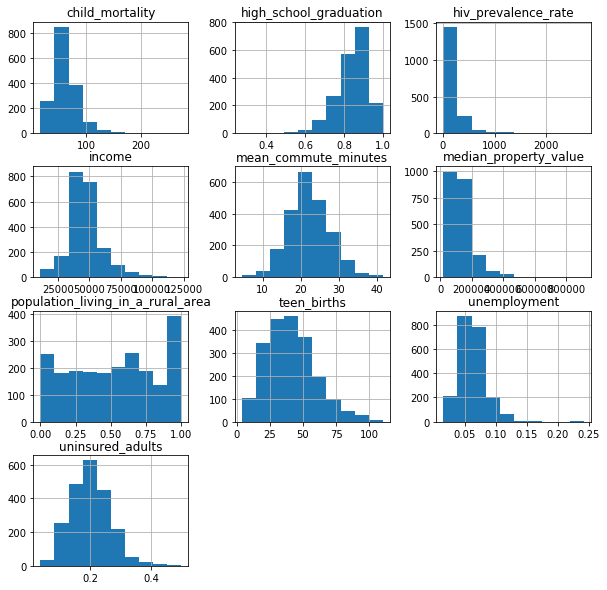

In [170]:
county_mn.hist(figsize=(10,10));

In [171]:
# Buy or Sell if below this number
lower = dict(county_mn.quantile(0.25))

In [172]:
# Hold if between these numbers
county_mn.quantile([.25, .75])

,mean_commute_minutes,child_mortality,high_school_graduation,hiv_prevalence_rate,income,median_property_value,uninsured_adults,population_living_in_a_rural_area,teen_births,unemployment
0.25,18.632167,47.008333,0.796667,69.328333,38931.166667,90433.333333,0.155333,0.256,27.191667,0.049000
0.75,25.401075,73.166667,0.899667,226.916167,52390.083333,161300.000000,0.239333,0.793,51.766667,0.074333


In [173]:
# Buy or Sell if above this number
upper = dict(county_mn.quantile(.75))

In [174]:
apt_features = list(county_mn.columns)

In [218]:
# Buy if LOW
buy_low = ['mean_commute_minutes',
 'child_mortality',
 'hiv_prevalence_rate',
 'population_living_in_a_rural_area',
 'teen_births',
 'unemployment',
 'uninsured_adults'
]

# Sell if LOW
sell_low = ['high_school_graduation',
 'income',
 'median_property_value'
]


In [219]:
counties = list(county_mn.index.values)

In [220]:
county_action = dict()
for county in counties:
    for feat,val in county_mn.loc[county].iteritems():
        if county not in county_action.keys():
            county_action[county] = dict()
            low_quart = lower[feat]
            up_quart = upper[feat]
            if feat in buy_low:
                if val <= low_quart:
                    county_action[county][feat] = 1 # buy
                elif val >= up_quart:
                    county_action[county][feat] = -1 # sell
                else:
                    county_action[county][feat] = 0 # hold
            elif feat in sell_low:
                if val <= low_quart:
                    county_action[county][feat] = -1 # sell 
                elif val >= up_quart:
                    county_action[county][feat] = 1 # buy
                else:
                    county_action[county][feat] = 0 # hold
        else:
            low_quart = lower[feat]
            up_quart = upper[feat]
            if feat in buy_low:
                if val <= low_quart:
                    county_action[county][feat] = 1 
                elif val >= up_quart:
                    county_action[county][feat] = -1
                else:
                    county_action[county][feat] = 0
            elif feat in sell_low:
                if val <= low_quart:
                    county_action[county][feat] = -1
                elif val >= up_quart:
                    county_action[county][feat] = 1
                else:
                    county_action[county][feat] = 0
            


In [221]:
county_action_df = pd.DataFrame.from_dict(county_action, orient='index')
county_action_df.head()

,mean_commute_minutes,child_mortality,high_school_graduation,hiv_prevalence_rate,income,median_property_value,uninsured_adults,population_living_in_a_rural_area,teen_births,unemployment
Abbeville County,-1,-1,0,0,-1,-1,0,0,0,-1
Acadia Parish,-1,-1,0,0,-1,-1,-1,0,-1,0
Accomack County,0,-1,0,-1,0,0,-1,-1,-1,0
"Ada County, ID",1,1,0,0,1,1,0,1,1,1
Adair County,0,-1,0,1,-1,-1,0,0,0,0


In [222]:
bsh_results = county_action_df.mean(axis=1).round()

In [223]:
bsh_results = bsh_results.replace({-0.0: 'Hold', 0.0: 'Hold', -1.0: 'Sell', 1.0: 'Buy'})

In [224]:
bsh_results

Abbeville County              Hold
Acadia Parish                 Sell
Accomack County               Hold
Ada County, ID                 Buy
Adair County                  Hold
Adams County                  Hold
Adams County, CO              Hold
Adams County, PA               Buy
Addison County                 Buy
Adjuntas Municipio            Hold
Aguada Municipio              Hold
Aguadilla Municipio           Hold
Aguas Buenas Municipio        Hold
Aibonito Municipio            Hold
Aiken County, SC              Hold
Aitkin County                 Hold
Alachua County, FL            Hold
Alamance County, NC           Hold
Alameda County, CA            Hold
Alamosa County                Hold
Albany County                 Hold
Albany County, NY             Hold
Albemarle County, VA           Buy
Alcona County                 Hold
Alcorn County                 Hold
Aleutians East Borough        Hold
Aleutians West Census Area    Hold
Alexander County              Hold
Alexandria city, VA 

### MVP ++
The edited MVP considers only Class A apartments and narrows the Hold interval by giving more distinct Buy and Sell thresholds based on intuition about Class A apartments and where they would be most successful.

In [225]:
# New Lower Quartiles
lower2 = {'mean_commute_minutes': county_mn.mean_commute_minutes.quantile(0.35), # commute below 20 minutes
              'child_mortality': county_mn.child_mortality.quantile(0.15), # lower child mortality == better healthcare
              'hiv_prevalence_rate': county_mn.hiv_prevalence_rate.quantile(0.15), # lower hiv rate == better healthcare/lower homeless pop
              'population_living_in_a_rural_area': county_mn.population_living_in_a_rural_area.quantile(0.15), # only city dwellers live in apartments
              'teen_births': county_mn.teen_births.quantile(0.15), # better healthcare/education
              'unemployment': county_mn.unemployment.quantile(0.15), # lower == more people who can potentially afford class a apartments 
              'high_school_graduation': county_mn.high_school_graduation.quantile(0.35), # want higher 
              'income': county_mn.income.quantile(0.55), # need higher for people to afford class a apartments
              'uninsured_adults': county_mn.uninsured_adults.quantile(0.25), # want lower
              'median_property_value': county_mn.median_property_value.quantile(0.25) # want generally higher probably
             }

# New Upper Quartiles
upper2 = {'mean_commute_minutes': county_mn.mean_commute_minutes.quantile(0.95),
              'child_mortality': county_mn.child_mortality.quantile(0.60),
              'hiv_prevalence_rate': county_mn.hiv_prevalence_rate.quantile(0.60),
              'population_living_in_a_rural_area': county_mn.population_living_in_a_rural_area.quantile(0.65),
              'teen_births': county_mn.teen_births.quantile(0.65),
              'unemployment': county_mn.unemployment.quantile(0.65),
              'high_school_graduation': county_mn.high_school_graduation.quantile(0.90),
              'income': county_mn.income.quantile(0.95),
              'uninsured_adults': county_mn.uninsured_adults.quantile(0.65),
              'median_property_value': county_mn.median_property_value.quantile(0.75)
             }


In [226]:
county_action2 = dict()
for county in counties:
    for feat,val in county_mn.loc[county].iteritems():
        if county not in county_action2.keys():
            county_action2[county] = dict()
            low_quart = lower2[feat]
            up_quart = upper2[feat]
            if feat in buy_low:
                if val <= low_quart:
                    county_action2[county][feat] = 1 # buy
                elif val >= up_quart:
                    county_action2[county][feat] = -1 # sell
                else:
                    county_action2[county][feat] = 0 # hold
            elif feat in sell_low:
                if val <= low_quart:
                    county_action2[county][feat] = -1 # sell 
                elif val >= up_quart:
                    county_action2[county][feat] = 1 # buy
                else:
                    county_action2[county][feat] = 0 # hold
        else:
            low_quart = lower2[feat]
            up_quart = upper2[feat]
            if feat in buy_low:
                if val <= low_quart:
                    county_action2[county][feat] = 1 
                elif val >= up_quart:
                    county_action2[county][feat] = -1
                else:
                    county_action2[county][feat] = 0
            elif feat in sell_low:
                if val <= low_quart:
                    county_action2[county][feat] = -1
                elif val >= up_quart:
                    county_action2[county][feat] = 1
                else:
                    county_action2[county][feat] = 0
            

In [230]:
county_action_df2 = pd.DataFrame.from_dict(county_action2, orient='index')
county_action_df2.head()

,mean_commute_minutes,child_mortality,high_school_graduation,hiv_prevalence_rate,income,median_property_value,uninsured_adults,population_living_in_a_rural_area,teen_births,unemployment
Abbeville County,0,-1,-1,-1,-1,-1,-1,-1,0,-1
Acadia Parish,0,-1,-1,-1,-1,-1,-1,0,-1,0
Accomack County,0,-1,0,-1,-1,0,-1,-1,-1,0
"Ada County, ID",1,1,-1,0,0,1,0,1,1,0
Adair County,0,-1,0,1,-1,-1,0,-1,0,0


In [231]:
bsh_results2 = county_action_df2.mean(axis=1).round()

In [232]:
bsh_results2 = bsh_results2.replace({-0.0: 'Hold', 0.0: 'Hold', -1.0: 'Sell', 1.0: 'Buy'})

In [233]:
bsh_results2

Abbeville County              Sell
Acadia Parish                 Sell
Accomack County               Sell
Ada County, ID                Hold
Adair County                  Hold
Adams County                  Hold
Adams County, CO              Hold
Adams County, PA              Hold
Addison County                Hold
Adjuntas Municipio            Hold
Aguada Municipio              Hold
Aguadilla Municipio           Hold
Aguas Buenas Municipio        Hold
Aibonito Municipio            Hold
Aiken County, SC              Hold
Aitkin County                 Hold
Alachua County, FL            Hold
Alamance County, NC           Hold
Alameda County, CA            Hold
Alamosa County                Hold
Albany County                 Hold
Albany County, NY             Hold
Albemarle County, VA          Hold
Alcona County                 Hold
Alcorn County                 Hold
Aleutians East Borough        Hold
Aleutians West Census Area    Hold
Alexander County              Sell
Alexandria city, VA 

In [235]:
with open('bsh_results2.pkl', 'wb') as f:
    pickle.dump(bsh_results2, f)

## Explanation and Future Work

The MVP takes into consideration what features should have higher or lower rates when buying or selling an apartment property. Some are relatively clearcut; the rate of people living in rural areas should be low, the mean commute should be low - both are indications of urban life and of areas where people will be able to live in multi-home housing. Some features are less clear: income, high school graduation rate, unemployment - today many people (especially millenials with high-paying tech jobs and who live in cities) choose to live in apartments regardless of income, but then many people with lower incomes, etc have no choice but to live in rental or lower cost rental housing. The MVP accounts for some of the ambiguity surrounding these features by having a very large Hold boundary (the middle 50% quartile). To continue beyond the MVP, more research would have to be done into each feature and the type of apartment would have to be narrowed down (ie. Class A, B, or C, low-income, etc). Hard-coded thresholds could also be supplemented with further inspection of each individual feature - the use of quartiles works under the assumption that the data is normally distributed, but not all features are. 

### Also,
For future iterations, all joining and data cleaning would have been done in a SQL database, rather than locally.